### Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data:

In [2]:
data = pd.read_csv('../data/clean/data_cleaned.csv')

data.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,pass/fail_math,math_score,pass/fail_reading,reading_score,pass/fail_writing,writing_score,failed_courses,midterm_results,average_grade
0,M,A,high school,standard,yes,passed,67,passed,67,passed,63,good standing,good standing,65.67
1,F,D,no high school,reduced,no,failed,40,failed,59,failed,55,math/reading,summer school,51.33
2,M,E,high school,reduced,no,failed,59,passed,60,failed,50,math/writing,summer school,56.33
3,M,B,high school,standard,no,passed,77,passed,78,passed,68,good standing,good standing,74.33
4,M,E,associate,standard,yes,passed,78,passed,73,passed,68,good standing,good standing,73.00


### Checking the column types:

#### Numerical columns:

In [8]:
numericals = data.select_dtypes(np.number)
categoricals = data.select_dtypes(object)

numericals.head()

,math_score,reading_score,writing_score,average_grade
0,67,67,63,65.67
1,40,59,55,51.33
2,59,60,50,56.33
3,77,78,68,74.33
4,78,73,68,73.00


#### Describing numericals:

In [12]:
numericals.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.396,15.402871,13.00,56.000,66.50,77.00,100.0
reading_score,1000.0,69.002,14.737272,27.00,60.000,70.00,79.00,100.0
writing_score,1000.0,67.738,15.600985,23.00,58.000,68.00,79.00,100.0
average_grade,1000.0,67.712,14.514123,21.67,58.585,67.33,78.33,100.0


#### Categorical columns:

In [11]:
categoricals.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,pass/fail_math,pass/fail_reading,pass/fail_writing,failed_courses,midterm_results
0,M,A,high school,standard,yes,passed,passed,passed,good standing,good standing
1,F,D,no high school,reduced,no,failed,failed,failed,math/reading,summer school
2,M,E,high school,reduced,no,failed,passed,failed,math/writing,summer school
3,M,B,high school,standard,no,passed,passed,passed,good standing,good standing
4,M,E,associate,standard,yes,passed,passed,passed,good standing,good standing


#### Describing categoricals:

In [13]:
categoricals.describe().T

,count,unique,top,freq
gender,1000,2,M,517
ethnicity,1000,5,C,323
parental_education,1000,5,high school,424
lunch,1000,2,standard,652
test_preparation_course,1000,2,no,665
pass/fail_math,1000,2,passed,665
pass/fail_reading,1000,2,passed,752
pass/fail_writing,1000,2,passed,712
failed_courses,1000,7,good standing,588
midterm_results,1000,2,good standing,588


### Displaying unique values:

In [183]:
def show_unique(data):
    print('The unique values in gender are: ',  data['gender'].unique())
    print()
    print('The unique values in ethnicity are: ',  np.sort(data['ethnicity'].unique()))
    print()
    print('The unique values in parental_education are: ', data['parental_education'].unique())
    print()
    print('The unique values in lunch are: ', data['lunch'].unique())
    print()
    print('The unique values in pass/fail_math are: ', data['pass/fail_math'].unique())
    print()
    print('The unique values in math_score are: ', np.sort(data['math_score'].unique()))
    print()
    print('The unique values in pass/fail_math are: ', data['pass/fail_reading'].unique())
    print()
    print('The unique values in math_score are: ', np.sort(data['reading_score'].unique()))
    print()
    print('The unique values in pass/fail_writing are: ', data['pass/fail_writing'].unique())
    print()
    print('The unique values in writing_score are: ', np.sort(data['writing_score'].unique()))
    print()
    print('The unique values in failed_courses are: ', data['failed_courses'].unique())
    print()
    print('The unique values in midterm_results are: ', data['midterm_results'].unique())

In [184]:
show_unique(data)

The unique values in gender are:  ['M' 'F']

The unique values in ethnicity are:  ['A' 'B' 'C' 'D' 'E']

The unique values in parental_education are:  ['high school' 'no high school' 'associate' 'bachelor' 'master']

The unique values in lunch are:  ['standard' 'reduced']

The unique values in pass/fail_math are:  ['passed' 'failed']

The unique values in math_score are:  [ 13  23  25  26  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100]

The unique values in pass/fail_math are:  ['passed' 'failed']

The unique values in math_score are:  [ 27  28  29  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  7

### Finding outliers:

In [54]:
def plot_outliers(data):
    
    fig, ax = plt.subplots(1,4, figsize=(5,5))
    plt.tight_layout()
    ax[0].set_title('math_score')
    sns.boxplot(y=data['math_score'], ax=ax[0])
    
    ax[1].set_title('reading_score')
    sns.boxplot(y=data['reading_score'], ax=ax[1], color='blue')
    
    ax[2].set_title('writing_score')
    sns.boxplot(y=data['writing_score'], ax=ax[2], color='green')
    
    ax[3].set_title('average_grade')
    sns.boxplot(y=data['average_grade'], ax=ax[3], color='red')
    
    plt.tight_layout()
    plt.show()

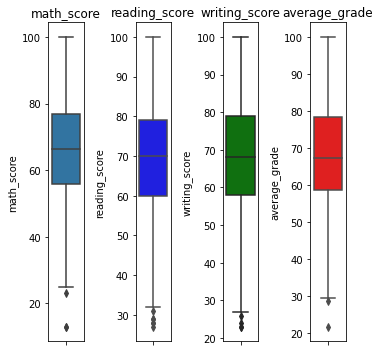

In [55]:
plot_outliers(data)

In [83]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = data[((data<(Q1 - 1.5*IQR))) | (data>(Q3 + 1.5*IQR))]
    
    return list(outliers)

In [87]:
print('The outliers in math score are: ', find_outliers(data['math_score']))
print('The outliers in reading score are: ', find_outliers(data['reading_score']))
print('The outliers in writing score are: ', find_outliers(data['writing_score']))


The outliers in math score are:  [23, 13, 13]
The outliers in reading score are:  [28, 29, 27, 28, 31, 29]
The outliers in writing score are:  [24, 23, 26, 23]


Will not remove these outliers since they present valuable information about the lowest performers in the tests.

### Plotting the data:

### Grades by gender:

In [135]:
gender_grades = data.groupby('gender').agg({'average_grade': 'mean'}).reset_index()
gender_count = data.groupby('gender').agg({'average_grade': 'count'}).reset_index()

gender_grades

,gender,average_grade
0,F,68.930911
1,M,66.573250


[Text(0, 0.5, 'average_grade'),
 Text(0.5, 0, 'gender'),
 Text(0.5, 1.0, 'Students by Gender')]

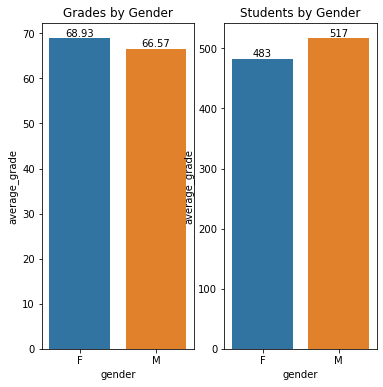

In [153]:
fig, ax = plt.subplots(1,2, figsize=(6,6))

plot_1 = sns.barplot(data=round(gender_grades,2), x='gender', y='average_grade', ax=ax[0])
plot_1.bar_label(plot_1.containers[0], label_type='edge')
plot_1.set(ylabel='average_grade', xlabel='gender', title='Grades by Gender')

plot_2 = sns.barplot(data=gender_count, x='gender', y='average_grade', ax=ax[1])
plot_2.bar_label(plot_2.containers[0], label_type='edge')
plot_2.set(ylabel='average_grade', xlabel='gender', title='Students by Gender')

plt.tight_layout()

### Grades by ethnicity:

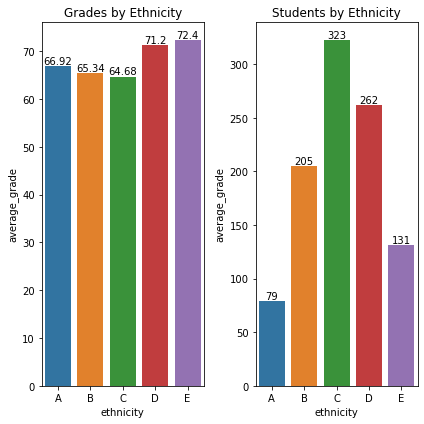

In [152]:
ethnicity_grades = data.groupby('ethnicity').agg({'average_grade': 'mean'}).reset_index()
ethnicity_count = data.groupby('ethnicity').agg({'average_grade': 'count'}).reset_index()

fig, ax = plt.subplots(1,2, figsize=(6,6))

plot_1 = sns.barplot(data=round(ethnicity_grades,2), x='ethnicity', y='average_grade', ax=ax[0])
plot_1.bar_label(plot_1.containers[0], label_type='edge')
plot_1.set(ylabel='average_grade', xlabel='ethnicity', title='Grades by Ethnicity')

plot_2 = sns.barplot(data=ethnicity_count, x='ethnicity', y='average_grade', ax=ax[1])
plot_2.bar_label(plot_2.containers[0], label_type='edge')
plot_2.set(ylabel='average_grade', xlabel='ethnicity', title='Students by Ethnicity')

plt.tight_layout()

### Grades by parental education:

In [116]:
education_grades = data.groupby('parental_education').agg({'average_grade': 'mean'}).reset_index()

education_grades_count = data.groupby('parental_education').agg({'average_grade': 'count'}).reset_index()

education_grades_count
#display(education_grades)

,parental_education,average_grade
0,associate,203
1,bachelor,112
2,high school,424
3,master,70
4,no high school,191


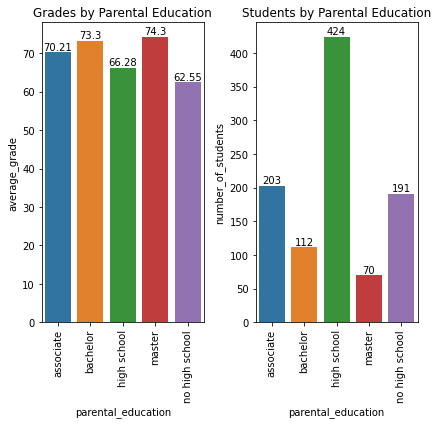

In [157]:
fig, ax = plt.subplots(1,2, figsize=(6,6))

plot_1 = sns.barplot(data=round(education_grades,2), x='parental_education', y='average_grade', ax=ax[0])
plot_1.tick_params(axis='x', rotation=90)
plot_1.bar_label(plot_1.containers[0], label_type='edge')
plot_1.set(ylabel='average_grade', xlabel='parental_education', title='Grades by Parental Education')

plot_2 = sns.barplot(data=education_grades_count, x='parental_education', y='average_grade', ax=ax[1])
plot_2.tick_params(axis='x', rotation=90)
plot_2.bar_label(plot_2.containers[0], label_type='edge')
plot_2.set(ylabel='number_of_students', xlabel='parental_education', title='Students by Parental Education')

plt.tight_layout()

### Grades by lunch plan:

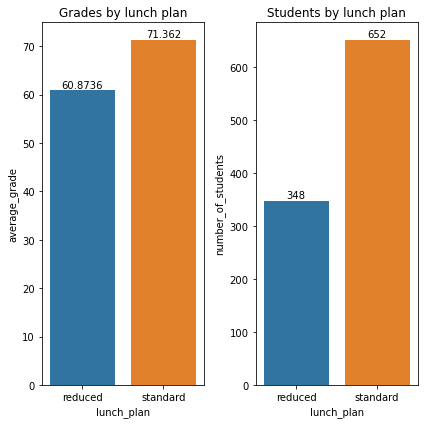

In [158]:
lunch_grades = data.groupby('lunch').agg({'average_grade': 'mean'}).reset_index()
lunch_count = data.groupby('lunch').agg({'average_grade': 'count'}).reset_index()

fig, ax = plt.subplots(1,2, figsize=(6,6))

plot_1 = sns.barplot(data=lunch_grades, x='lunch', y='average_grade', ax=ax[0])
plot_1.bar_label(plot_1.containers[0], label_type='edge')
plot_1.set(ylabel='average_grade', xlabel='lunch_plan', title='Grades by lunch plan')

plot_2 = sns.barplot(data=lunch_count, x='lunch', y='average_grade', ax=ax[1])
plot_2.bar_label(plot_2.containers[0], label_type='edge')
plot_2.set(ylabel='number_of_students', xlabel='lunch_plan', title='Students by lunch plan')

plt.tight_layout()

### Grades by preparation course:

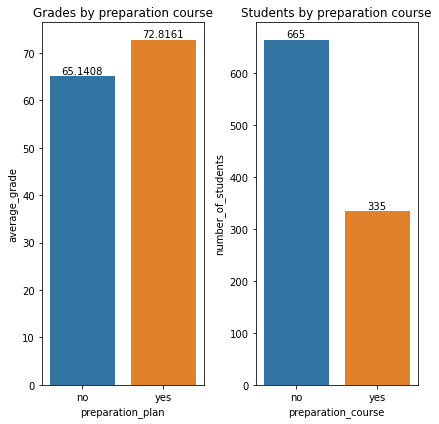

In [162]:
preparation_grades = data.groupby('test_preparation_course').agg({'average_grade': 'mean'}).reset_index()
preparation_count = data.groupby('test_preparation_course').agg({'average_grade': 'count'}).reset_index()

fig, ax = plt.subplots(1,2, figsize=(6,6))

plot_1 = sns.barplot(data=preparation_grades, x='test_preparation_course', y='average_grade', ax=ax[0])
plot_1.bar_label(plot_1.containers[0], label_type='edge')
plot_1.set(ylabel='average_grade', xlabel='preparation_plan', title='Grades by preparation course')

plot_2 = sns.barplot(data=preparation_count, x='test_preparation_course', y='average_grade', ax=ax[1])
plot_2.bar_label(plot_2.containers[0], label_type='edge')
plot_2.set(ylabel='number_of_students', xlabel='preparation_course', title='Students by preparation course')

plt.tight_layout()

### Pass/failed in all courses:

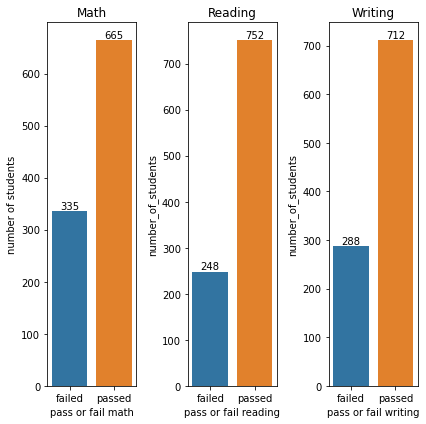

In [174]:
math_data = data.groupby('pass/fail_math').agg({'average_grade': 'count'}).reset_index()
reading_data = data.groupby('pass/fail_reading').agg({'average_grade': 'count'}).reset_index()
writing_data = data.groupby('pass/fail_writing').agg({'average_grade': 'count'}).reset_index()

fig, ax = plt.subplots(1,3, figsize=(6,6))

plot_1 = sns.barplot(data=math_data, x='pass/fail_math', y='average_grade', ax=ax[0])
plot_1.bar_label(plot_1.containers[0], label_type='edge')
plot_1.set(ylabel='number of students', xlabel='pass or fail math', title='Math')

plot_2 = sns.barplot(data=reading_data, x='pass/fail_reading', y='average_grade', ax=ax[1])
plot_2.bar_label(plot_2.containers[0], label_type='edge')
plot_2.set(ylabel='number_of_students', xlabel='pass or fail reading', title='Reading')

plot_3 = sns.barplot(data=writing_data, x='pass/fail_writing', y='average_grade', ax=ax[2])
plot_3.bar_label(plot_3.containers[0], label_type='edge')
plot_3.set(ylabel='number_of_students', xlabel='pass or fail writing', title='Writing')

plt.tight_layout()

### Correlation matrix:

<AxesSubplot:>

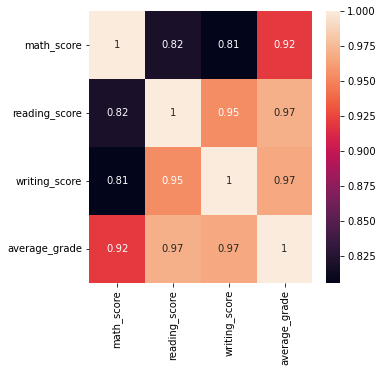

In [176]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(), annot=True)